# Stock Price Prediction using Machine Learning
# Capstone Report

# Domain Background

In Today’s market investing in a stock is a biggest challenge to the investors. Stocks prices are unpredictable, it depends on various factors such as social media, political, financial, crisis, global relationship, demand, president and many more. Buying a stock means buying a part of the company.  Making money or losing money depends on stock price up and down, so predicting price of the stock is the biggest achievement for the investors. 

Number of companies from Small to large businesses are trading publicly on the world stock market with billions of investors. Platform is so simple that anyone can choose any stock exchange and invest with min amount. In order to get more profit out of stock market one should play smartly with good strategy. That can be achieved by building best Machine Learning models to predict the future trend by using past historical data and event driven indicators.  

Herbart Alexander Simon says that “Machine learning is concerned with computer programs that automatically improve their performance through experience.” The field of prediction is primarily focused on minimizing the errors and giving more accurate predictions.

# Motivation

As like everyone, I also started investing in stock market and still I am not clear that how stock market is going up and down. Once I took this Machine Learning Engineer program I started analyzing data, models and methodologies, then I am able to understand. For this Nanodegree project I am choosing the project of my interest, so I can show more interest towards my ML program.

# Problem Statement

Prediction stock market is not that easy and at the same time it’s not that tough. Stock market is a complex and forecasting is characterized by data intensity, events, hidden relationships and nature of the market. Predicting fluctuating price with time in stock market is quite difficult. 

Prediction in investment and trading is ongoing research, as part of this Nanodegree capstone project I am going to predict the stock price by using well-known machine learning models. I will be considering past 8 years of time-series historical data for selected stock. 

# Solution Statement

There are number of algorithms/models to predict time-series based problems. In this project I don’t want to jump to top model with all possible indicators to predict stocks. As a beginner I am going to complete project by applying simple supervised learning methods, which I learned from this Nanodegree course. This time-series based project is the regression problem and proposed solution involved applying Long Short-Term Memory (LSTM) from recurrent neural network architecture. Decision Tree Regression model for the benchmarking. In addition to the proposal I am going to use two other models for this project Support Vector Regressor (SVM )and Random Forest.
For the model I am going to use 8 years of historical data with few technical indicators such as moving average convergence-divergence (MACD), relative strength index (RSI) and simple moving average (SMA).
I will compare both the benchmark and solution models and provide more insights.

Optional: As of now I am thinking of these models to implement for this project but once I start implementing I might think of better models and better technical indicators to use for this project. 


# Project Design

Project will be completed on the Jupyter Notebook with python language. This project requires pandas, numpy, scikit-learn, keras, matplotlib and seaborn libraries so I will be using importing this before I start. 
Development code will  found in stock_prediction.ipynb notebook.

Machine Learning Work Flow:

1.	Data Collection, Exploration and Preprocessing
2.	Data visualization
3.	Feature selection/Technical indicator selection
4.	Normalize the data
5.	Split the data into Train, Test and Validation sets
6.	Implementing model prediction and evaluation 
7.	Finally, compare the result with benchmark model.


# Import Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler #For Normalizing the data
from sklearn.model_selection import TimeSeriesSplit #For splitting the data
from sklearn.tree import DecisionTreeRegressor # For Benchmark model
from sklearn.metrics import mean_squared_error, r2_score # For RMSE and R2 Score

from sklearn.svm import SVR #for SVR model
from sklearn.ensemble import RandomForestRegressor #for RandomForest model
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential #Keras for solution LSTM model
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.
/Users/santhosh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/santhosh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/santhosh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/santhosh/opt/anaconda3/lib/p

# 1.	Data Collection, Exploration and Preprocessing

# Data Collection
Selected data is downloaded from 
Stock market historical data can be found from many places, but I choose to download from https://finance.yahoo.com/. There are many web scraping API’s available to get the data based on selected dates. I downloaded CSV files, I am going to analyze 8 years of historical data from 2011-12-30 to 2019-12-30.

For the stock prediction I am selecting two stocks from two different sectors one from Coffee house and another from Telecommunications. 
1.	Starbucks (SBUX)
2.	ATT (T)

# Dataset Characteristics
     Date :  Calendar date of the trading day 
     Open : Opining price of the trading day 
     High : Highest price of the stock traded during the day
     Low : Lowest price of the stock traded during the day
     Close : Closing price of the trading day
     Adj Close : Adjusted closing price of the trading day
     Volume : Number of shares traded in exchange during the day

# Read CSV's

In [2]:
#load data from csv, change index to date, parse_dates
#path : csv file location
path = "/Users/santhosh/Desktop/Machine_Learning_Engineer/Stock_Prediction/data"

#reading CSV, assigning starbucks variable to starbucks data and att to att data.
#Fixing date by parsing date columns
starbucks = pd.read_csv(os.path.join(path, 'SBUX.csv'), index_col='Date',parse_dates=True,infer_datetime_format=True)
att = pd.read_csv(os.path.join(path, 'T.csv'), index_col='Date',parse_dates=True,infer_datetime_format=True)

# Data Exploration and Preprocessing

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,23.424999,23.520000,22.639999,22.645000,19.675068,12922400
2012-01-04,22.705000,23.315001,22.639999,23.084999,20.057360,13886800
2012-01-05,23.094999,23.200001,22.775000,23.180000,20.139898,9731800
2012-01-06,23.190001,23.455000,23.115000,23.360001,20.296291,8105400
2012-01-09,23.365000,23.400000,23.135000,23.295000,20.239815,7261600


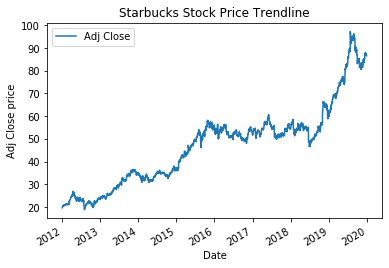

In [3]:
#Starbucks sample data and trendline visualization
display(starbucks.head())
df_s = starbucks.drop(columns = ['Open','High', 'Low', 'Close', 'Volume'])
plot = df_s.plot(title="Starbucks Stock Price Trendline")
plot.set_xlabel("Date")
plot.set_ylabel("Adj Close price")    
plt.show()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-30,30.100000,30.299999,30.080000,30.240000,19.111830,15687800
2012-01-03,30.459999,30.540001,30.299999,30.379999,19.200312,33005300
2012-01-04,30.580000,30.680000,30.350000,30.430000,19.231915,37213900
2012-01-05,30.490000,30.500000,30.180000,30.400000,19.212955,34457000
2012-01-06,30.070000,30.090000,29.600000,29.680000,19.033392,45580800


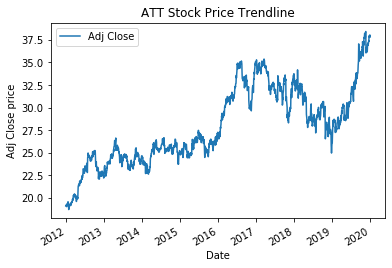

In [4]:
#ATT sample data and trendline visualization
display(att.head())
df_a = att.drop(columns = ['Open','High', 'Low', 'Close', 'Volume'])
plot = df_a.plot(title="ATT Stock Price Trendline")
plot.set_xlabel("Date")
plot.set_ylabel("Adj Close price")    
plt.show()

In [5]:
#Check shpae of the data
print("Starbucks selected data has rows : {} and cloumns : {} ".format(starbucks.shape[0], starbucks.shape[1]))
print("Att selected data has rows : {} and cloumns : {} ".format(att.shape[0], starbucks.shape[1]))

Starbucks selected data has rows : 2011 and cloumns : 6 
Att selected data has rows : 2012 and cloumns : 6 


# check the data for missing values

In [6]:
#checking for nyuull values
print("Starbucks data has missing values : {}".format(starbucks.isnull().values.any()))
print("Att data has missing values : {}".format(att.isnull().values.any()))

Starbucks data has missing values : False
Att data has missing values : False


In [7]:
#Basic info
display(starbucks.info())
display(att.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2011-12-30 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2012 non-null   float64
 1   High       2012 non-null   float64
 2   Low        2012 non-null   float64
 3   Close      2012 non-null   float64
 4   Adj Close  2012 non-null   float64
 5   Volume     2012 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


None

In [8]:
#Lets see some statistical values
print("Starbucks - Global Statistics:")
display(starbucks.describe())
print()
print("ATT - Global Statistics:")
display(att.describe())

Starbucks - Global Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,50.385403,50.795077,49.969863,50.395219,47.058367,1.012686e+07
std,17.108990,17.232945,16.972948,17.103142,17.561368,5.493606e+06
min,21.799999,22.090000,21.520000,21.580000,18.873688,1.847800e+06
25%,37.052499,37.387501,36.780000,37.012501,33.200750,6.792600e+06
50%,54.130001,54.580002,53.799999,54.189999,50.682381,8.593500e+06
75%,58.625000,59.155001,58.050001,58.635000,54.989284,1.173130e+07
max,98.139999,99.720001,97.209999,99.110001,97.239372,6.209110e+07



ATT - Global Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03
mean,35.343226,35.573255,35.094896,35.341690,27.924208,2.737767e+07
std,3.074129,3.079648,3.074469,3.082351,4.261648,1.363271e+07
min,27.500000,28.100000,26.799999,27.360001,18.699926,6.862400e+06
25%,33.320000,33.580002,33.067500,33.337501,24.760416,1.971698e+07
50%,35.009998,35.180000,34.779999,35.000000,26.892488,2.422520e+07
75%,37.422499,37.689999,37.140000,37.419998,31.423689,3.090855e+07
max,43.500000,43.889999,43.330002,43.470001,38.430523,1.950827e+08


# Correlation Analysis
In statistical analysis correlation is nothing but relation between variables. If correlation coefficient is positive correlated then both the values are moving in one direction, if coefficient is exactly one it is called perfect positive correlation. In other way negative correlated values moves in different direction.
Coefficient fluctuates in between -1 and 1, 0 means no realtion.

# Starbucks

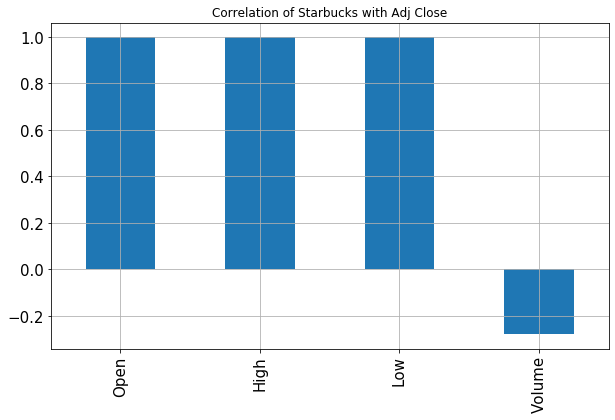

In [9]:
#correlating adj_close to other columns
#droping adj_close and close columns
s = starbucks.drop(columns=['Adj Close', 'Close'], axis=1)
s.corrwith(starbucks['Adj Close']).plot.bar(
                figsize = (10, 6), title = "Correlation of Starbucks with Adj Close", fontsize = 15,
                rot = 90, grid = True)

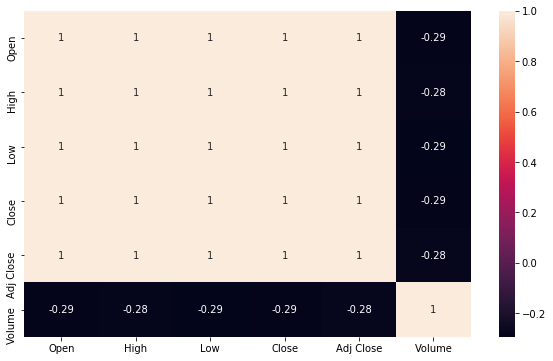

In [10]:
# Plotting Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(starbucks.corr(), annot = True)

In [11]:
matrix_corr = starbucks.corr()
coef = matrix_corr['Adj Close'].sort_values(ascending=False)

In [12]:
#Possitively correleated values
possitive_corr = coef[coef>0]
possitive_corr

Adj Close    1.000000
Close        0.998635
High         0.998450
Low          0.998420
Open         0.998137
Name: Adj Close, dtype: float64

In [13]:
#Negatively correlated values
negative_corr = coef[coef<0]
negative_corr

Volume   -0.277185
Name: Adj Close, dtype: float64

# ATT

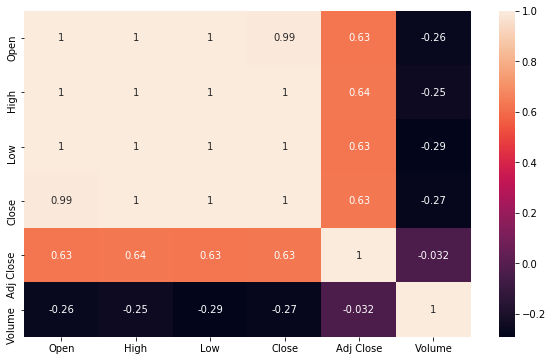

In [14]:
#Corr Matrix for ATT 
plt.figure(figsize=(10, 6))
sns.heatmap(att.corr(), annot = True)

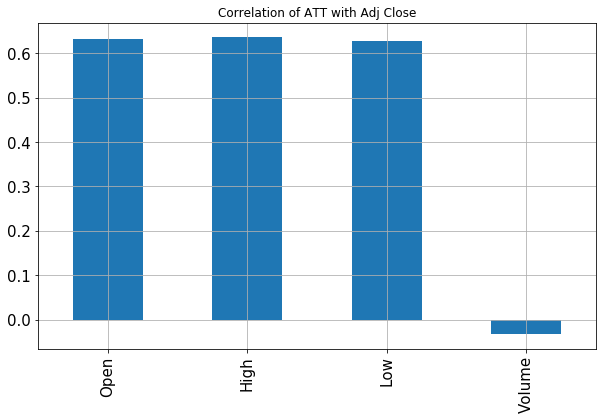

In [15]:
#correlating adj_close to other columns
#droping adj_close and close columns
a = att.drop(columns=['Adj Close', 'Close'], axis=1)
a.corrwith(att['Adj Close']).plot.bar(
                figsize = (10, 6), title = "Correlation of ATT with Adj Close", fontsize = 15,
                rot = 90, grid = True)

In [16]:
matrix_corr = att.corr()
coef = matrix_corr['Adj Close'].sort_values(ascending=False)
#Possitively correleated values
possitive_corr = coef[coef>0]
print(possitive_corr)
#Negatively correlated values
negative_corr = coef[coef<0]
negative_corr

Adj Close    1.000000
High         0.636244
Close        0.632773
Open         0.631463
Low          0.626976
Name: Adj Close, dtype: float64


Volume   -0.032356
Name: Adj Close, dtype: float64

# Feature selection/Technical indicator selection
Technical indicators are factors that drives the stock price, it helps to understand price movement and helps to predict the future price, that leads investors buy or sell choices.

# 5 Technical indicators
    # Relative Strength Index (RSI)
    # Moving Average Convergence-Divergence (MACD)
    # Simple Mean Average
    # Standard Deviation
    # Bollinger Bands

Technical indicators calculated based on the target.. I am selecting target as Adj Close



# Technical indicators

In [17]:
#Technical indicatiors methods
def get_RSI(df, periods=14):
    """
    Method is used to calculate the RSI
    args:
        df: Adj Close price of the dataframe
        periods: Standard periods to calcualte initial value is 14
    return:
        rsi: function returns the relative strength index of given input.
    ewm = exponential moving average 
    """
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rollUp = up.ewm(com=periods,adjust=False).mean()
    rollDown = down.ewm(com=periods, adjust=False).mean().abs()

    RSI = 100 - 100 / (1 + rollUp / rollDown)
    
    return RSI


def get_MACD(df, nslow=26, nfast=12):

    """
    Method is used to calculate Moving Average Convergence-Divergence
    args:
        df: Adj Close price of the dataframe
        nslow: number of observations in window required to have a value
        nfast: number of observations in window required to have a value
    return:
        differance: difference between two ewm with different window period
        MACD: Moving Average Convergence-Divergence
        
    ewm = exponential weighted functions
    min_periods = minimum number of observations in window required to have a value
    span = Specify decay in terms of span, 𝛼=2/(𝑠𝑝𝑎𝑛+1), for 𝑠𝑝𝑎𝑛≥1
    """
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    
    differance = emafast - emaslow
    MACD = differance.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    
    return differance, MACD

def get_SMA(df, peroids=15):
    """
     It takes a window size of periods at a time and perform mathematical operation on it. 
     A window of size periods means periods consecutive values at a time.
    args:
        df: Adj Close price of the dataframe
        periods: Standard observation used for calculation
    return:
        SMA : calcualtes simple moving average
    """
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    
    return SMA

def get_STDEV(df, periods=5):
    """
    args:
        df: Adj Close price of the dataframe
        periods: Standard observation used for calculation
    return:
        STDEV: calcualtes the standard deviation
    """
    STDEV = df.rolling(periods).std()
   
    return STDEV

def get_BBands(df, peroids=15):
    """
    args:
        df: Adj Close price of the dataframe
        periods: Standard observation used for calculation
    return:
        upper_band, lower_band : calculates the upper and lower bands of the bollinger
    """
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = get_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    
    return upper_band, lower_band
  

In [18]:
# calculates Technical indicators for the given dataframe
# final_df = pd.DataFrame()
def calc_Tech_ind_add_col(df, original_df):
    """
    calculates all the technical indicators and assigned to new variable
    add new columns to the dataframe with technical indicators.
    args:
        df : Adj Close price of the dataframe
        original_df : original dataframe of the stock
    return : 
        final_df:  final dataframe with technical indicators in that
    """
    print("Calculating technical indicators of given stock price")
    dif, macd_stock = get_MACD(df)
    upper_band, lower_band = get_BBands(df)   
    
    final_df = original_df
    
    final_df['RSI'] = get_RSI(df)
    print("RSI column added")
    final_df['MACD'] = macd_stock
    print("MACD column added")
    final_df['SMA'] = get_SMA(df)
    print("SMA column added")
    final_df['STDEV'] = get_STDEV(df)
    print("STDEV column added")
    final_df['Upper_Band'] = upper_band
    print("Upper_Band column added")
    final_df['Lower_Band'] = lower_band
    print("Lower_Band column added")   
    final_df['DIFF'] = dif
    print("DIFF column added")
    
    
    return final_df
    
    
    

# Normalize the Data

In [19]:
# In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.
def normalize_featuresDF(df):
    """
    It performs scaling/normalization of the feature columns using sklearn's MinMazScaler function.
    Range format is from 0 to 1
    args:
        df : featuers columsn datafrane
    return:
        normalized_features_df : normalized data frame ..
    
    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(columns=feature_columns, data=feature_minmax_data, index=df.index)
    
    
    return normalized_features_df


# Split the data into Train, Test and Validation sets
Spliting the data into 3 different sets.
Training set
Testing set
Validation set

   # split validation set from complete data

In [20]:
def split_ValidationSet(features_df, target_df, length=90):
    """
    method is to separate validation set from the complete df
    args:
        features_df: full features_df
        target_df :  full target_dt
        length: prediction length
    returns : 
        validation_x : returns features validations sets
        validation_y : returns target validations sets
    """
    #need to shift target array because we are prediction n + 1 days price
    target_df = target_df.shift(-1)
    #split validation set . i am spliting 10% latest data for validation.
    #target
    validation_y = target_df[-length:-1]
    validation_x = features_df[-length:-1]
    
    return validation_x, validation_y

#Now get final_features_df and final_target_df by excluding validation set
def split_Final_df(normalized_features_df, target_df, v_length=90):
    """
    This method will be having remaining data after the validation set.
    args:
        features_df: normalized features_df
        target_df: complete target_df
        v_length: validation set length
    return: 
        final_features_df : set of feature df excluding validation set
        final_target_df : set of target df excluding validation set
    """
    final_features_df = normalized_features_df[:-v_length]
    final_target_df = target_df[:-v_length]
    
    return final_features_df, final_target_df

#  Train and Test split using Sklearn's Timeseries split

In [21]:
#Split final set into training and testing sets
#splitting training and testing set using sklearn's TimeSeries split
def split_Train_Test_DF(final_features_df, final_target_df, n_splits=10):
    """
    Using sklearn's timeseries split to split the training and testing sets
    args:
        final_features_df: features_df after splitting validation set
        final_target_df: target_df after splitting validation set
    
    return: 
        x_train : traing feature set
        y_train : training target set
        x_test : testing feature set
        y_test : testing target set
    """
    ts_split = TimeSeriesSplit(n_splits)
    for train_index, test_index in ts_split.split(final_features_df):
        x_train, x_test = final_features_df[:len(train_index)], final_features_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = final_target_df[:len(train_index)].values.ravel(), final_target_df[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        
    return x_train, y_train, x_test, y_test


#  Visualizing the datasets for sanity check

In [22]:
def plot_3DataSets():
    """
    Method displays the plot of the 3 different sets into single plot.
    This is just for sanity check.
    This is time series data so, sets should not be mixed.
    
    """
    t=y_test.astype(np.float)
    v = target_df[-90:-1].values.ravel()
    plt.plot(y_train, label='trainning_set')
    plt.plot([None]*len(y_train) + [x for x in t], label='test_set')
    plt.plot([None]*(len(y_train)+len(t)) + [x for x in v], label='validation_set')
    plt.xlabel('Days')
    plt.ylabel('price')
    plt.title('Split dataset into training/validation/test set')
    plt.legend()


# Implementing model prediction and evaluation

# Method for validating result with evaluation metrics

In [23]:
#Method to evaluate the benchmark model and solution model with validate data set
def model_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    if model_name in [ "LSTM", "LSTM_Tuned"]:
        x_train_t, x_test_t, validation_x_t, validation_y_t = convert_LSTM_data(x_train, x_test, validation_x, validation_y)
        model = model(x_train, y_train, validation_x)
        prediction = model.predict(validation_x_t)
    else:
        model = model(x_train, y_train, validation_x)
        prediction = model.predict(validation_x)
    
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    
    R2_Score = r2_score(validation_y, prediction)
    
    #Ploting trendline for actual vs prediction
    plt.plot(validation_y.index, prediction,'r', label='Predicted')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.plot(figsize = (15,8))
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')

    plt.show()
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    
    return RMSE_Score, R2_Score


#Method to evaluate the final model with testing data set
def bestModel_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    USing testing data set for evaluation
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    
    #I am giving testing set for the evaluation 
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    
    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    
    R2_Score = r2_score(y_test, prediction)
    
    plt.title(model_name + 'Prediction Vs Actual')
    plt.plot(y_test, label='test data')
    plt.plot(prediction, label='prediction')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend();
    

    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
     
    return RMSE_Score, R2_Score


def value_Compare(model):
    """
    this method is used to create final data frame using testing value with predicted value.
    args:
        model : trained model to create df
    return : 
        df : df with test value and predicted value
    """
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    col1 = pd.DataFrame(y_test, columns=['True_value'])
    col2 = pd.DataFrame(prediction, columns = ['Predicted_value'])
    df = pd.concat([col1, col2], axis=1)
    
    return df



#  Build Models
Here I am going to introcude methods to impliment benchmark model and solution models.
Result of methods will be RMSE and R2 score with Plot.

# Benchmark Model
DecisionTreeRegressor

In [24]:

#modeling DecisionTreeRegressor with default parameters for benchmark

def model_Benchmark_DTR(x_train, y_train, validation_x, random_state=0):
    """
    Method is to model DecisionTreeRegressor
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
        random_state : default parameter it controls the randomness of the estimater
    
    return: 
        model : returns the trained model
        
    """
    #initialize DTR
    dtr = DecisionTreeRegressor(random_state=0)   
    #fit the data
    model = dtr.fit(x_train, y_train)
    
    return model

# Solution Model

# Support Vector Regressor (SVR)

In [25]:
def model_SVR(x_train, y_train, validation_x):
    
    """
    This method uses svr algorithm to trian the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    svr_model = SVR(kernel='linear')
    model = svr_model.fit(x_train, y_train)
#     prediction = model.predict(validation_x)
    
    return model

def model_SVRTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of C and epsilon.
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyperparameters_linearSVR = {
        'C':[0.5, 1.0, 10.0, 50.0, 100.0, 120.0,150.0, 300.0, 500.0,700.0,800.0, 1000.0],
        'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    }
    
    grid_search_SVR_feat = GridSearchCV(estimator=model_SVR(x_train, y_train, validation_x),
                           param_grid=hyperparameters_linearSVR,
                           cv=TimeSeriesSplit(n_splits=10),
    )

    model = grid_search_SVR_feat.fit(x_train, y_train)
    print(grid_search_SVR_feat.best_params_)
    
    return model

# Random Forest

In [26]:
def model_randomForest(x_train, y_train, validation_x):
    
    """
    This method uses random forest algorithm to trian the data.
    
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    randomForest_model = RandomForestRegressor(n_estimators=50, random_state=0)
    model = randomForest_model.fit(x_train, y_train)
#     prediction = model.predict(validation_x)
    
    return model

def model_randomForestTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of hyperparameters 
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyper_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10,13, 15, 20],
    }
    
    grid_search_RF_feat = GridSearchCV(estimator=model_randomForest(x_train, y_train, validation_x),
                           param_grid=hyper_parameters,
                           cv=TimeSeriesSplit(n_splits=10),
        )
    model = grid_search_RF_feat.fit(x_train, y_train)
    print(model.best_params_)
    
    return model

# LSTM

In [27]:
#LSTM model need feature input in array
#convert data to array

def convert_LSTM_data(x_train, x_test, validation_x, validation_y):
# def convert_LSTM_data():
    """
    Method is used to format the data sets into LSTM input data format.
    
    args:
        x_train : final feautre training set
        x_test : final feature testing set
        validation_x : validation feature test
        validation_y: validation target test
    return:
        formats the input data into LSTM input format
    """
    
    x_train =np.array(x_train)
    x_test =np.array(x_test)
    validation_x =np.array(validation_x)
    validation_y = np.array(validation_y)
    
    #reshape sets
    #Need to check this ?????
    #shpae pf LSTM is (number of records, number of times steps, feature dimension)   
    x_train_lstm = np.reshape(x_train, (x_train.shape[0],1,  x_train.shape[1]))
    x_test_lstm = np.reshape(x_test, (x_test.shape[0],1, x_test.shape[1]))
    
    validation_x_lstm = np.reshape(validation_x, (validation_x.shape[0], 1, validation_x.shape[1]))
    validation_y_lstm = np.reshape(validation_y, (validation_y.shape[0],1, validation_y.shape[1]))
    
    return x_train_lstm, x_test_lstm, validation_x_lstm, validation_y_lstm


In [28]:
# LSTM model prediction funciton
def model_LSTM(x_train, y_train, validation_x, convertion_model = convert_LSTM_data):
    """
    args:
        x_train : final feautre training set
        x_test : final feature testing set
        validation_x : validation feature test
        convertion_model : this is just method to format the LSTM data
    return:
        return : returns the trained model
    """
    K.clear_session()
    x_train_t, x_test_t, validation_x_t, validation_y_t = convertion_model(x_train, x_test, validation_x, validation_y)
    # instantiate the Sequential class
    model = Sequential()
    #Create LSTM and Drop out Layers, return_sequences = True because we will add more layers to the model
    #input_shape(number of time steps, number of indicators/features)
    model.add(LSTM(units=50, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=True))
    #dropout layter is to avoid over-fitting
    model.add(Dropout(0.2))
    #Add few more laters and dropouts to the model
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    #Create Dense layer, number of neurons in dense layer  = 1 becasue we want to predict one value
    model.add(Dense(units = 1))
    #need to compile before training the data
    #
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
    
    history_model = model.fit(x_train_t, y_train, epochs=200, batch_size=32,callbacks=[early_stop])
#     prediction = model_lstm.predict(validation_x_t)
   
    return model



#      
# LSTM model prediction funciton
def model_LSTMTuning(x_train, y_train, validation_x, convertion_model = convert_LSTM_data):
    """
    Using 0.5 dropout layers and batch size 16 for the tuning
    args:
        x_train : final feautre training set
        x_test : final feature testing set
        validation_x : validation feature test
        convertion_model : this is just method to format the LSTM data
    return:
        return : returns the trained model
    """
    K.clear_session()
    x_train_t, x_test_t, validation_x_t, validation_y_t = convertion_model(x_train, x_test, validation_x, validation_y)
    # instantiate the Sequential class
    model = Sequential()
    #Create LSTM and Drop out Layers, return_sequences = True because we will add more layers to the model
    #input_shape(number of time steps, number of indicators/features)
    model.add(LSTM(units=50, input_shape=(1, x_train.shape[1]), activation='relu', return_sequences=True))
    #dropout layter is to avoid over-fitting
    model.add(Dropout(0.5))
    #Add few more laters and dropouts to the model
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(units=50))
    model.add(Dropout(0.5))
    
    #Create Dense layer, number of neurons in dense layer  = 1 becasue we want to predict one value
    model.add(Dense(units = 1))
    #need to compile before training the data
    #
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
      
    history_model = model.fit(x_train_t, y_train, epochs=200, batch_size=16,callbacks=[early_stop])
 
    return model




# Implimentation
First i am going to impliment Starbucks prediction and then follw the same steps for the ATT

Above i have done data exploration and defined all the function to impliment prediction. I will call those methods step by steps and evaluate the benchmark and solution models.

Steps:
1. get the original data
2. feature selection / Technicla indicator
3. Selecting features and target df
4. Normalizing the data
5. Split train/test/validation sets
6. evaluating models
7. follow same for ATT data
8. conclusion


# Starbucks 

In [29]:
#reading CSV, assigning starbucks variable to starbucks data and att to att data.
#Fixing date by parsing date columns
starbucks = pd.read_csv(os.path.join(path, 'SBUX.csv'), index_col='Date',parse_dates=True,infer_datetime_format=True)

In [30]:
#checking for null values
print("Starbucks data has missing values : {}".format(starbucks.isnull().values.any()))
#Basic info
display(starbucks.info())

Starbucks data has missing values : False
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


None

In [31]:
#Get adj_close data for the technical indicators
df_tech = starbucks['Adj Close']

#calculate technical indicators and adding indicators to the data
final_df = calc_Tech_ind_add_col(df_tech, starbucks)
final_df.columns

Calculating technical indicators of given stock price
RSI column added
MACD column added
SMA column added
STDEV column added
Upper_Band column added
Lower_Band column added
DIFF column added


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MACD',
       'SMA', 'STDEV', 'Upper_Band', 'Lower_Band', 'DIFF'],
      dtype='object')

In [32]:
#Final dataframe with all the technical indicators
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,,,
2012-01-03,23.424999,23.520000,22.639999,22.645000,19.675068,12922400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,22.705000,23.315001,22.639999,23.084999,20.057360,13886800,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,23.094999,23.200001,22.775000,23.180000,20.139898,9731800,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,23.190001,23.455000,23.115000,23.360001,20.296291,8105400,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,23.365000,23.400000,23.135000,23.295000,20.239815,7261600,98.855975,NaN,NaN,0.245142,NaN,NaN,NaN


In [33]:
#Checking no of null values in each columns
final_df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
RSI            1
MACD          33
SMA           14
STDEV          4
Upper_Band    14
Lower_Band    14
DIFF          25
dtype: int64

In [34]:
#Removing null rows from final_df
#final_df has 33 null values so dropping those rows --> this is because introduction of technical indicators
final_df = final_df[33:]

# Selecting features df and target df
Target is Adj Close

Features are ['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD','SMA', 'STDEV', 'Upper_Band', 'Lower_Band', 'DIFF']

In [35]:
#getting feature df from final_df
features_df = final_df[['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD',
       'SMA', 'STDEV', 'Upper_Band', 'Lower_Band', 'DIFF']]
#getting target df from final_df
target_df = final_df[['Adj Close']]

In [36]:
#Checking no of null values in each columns
final_df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
RSI           0
MACD          0
SMA           0
STDEV         0
Upper_Band    0
Lower_Band    0
DIFF          0
dtype: int64

In [37]:
#Check sample of feature and target df
display(features_df.head(5))
display(target_df.head(5))

,Open,High,Low,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,
2012-02-21,24.209999,24.434999,24.035000,8291600,64.934085,0.136359,21.128960,0.141858,21.569009,20.688910,0.107286
2012-02-22,24.145000,24.219999,23.934999,8649400,65.384791,0.126738,21.145776,0.047496,21.552878,20.738674,0.093420
2012-02-23,24.170000,24.275000,24.000000,8253400,66.247952,0.117772,21.157102,0.046198,21.550886,20.763319,0.085759
2012-02-24,24.200001,24.350000,24.049999,6553400,64.138811,0.108266,21.180577,0.039357,21.492171,20.868983,0.073511
2012-02-27,24.065001,24.280001,23.889999,6713000,63.195723,0.098214,21.182901,0.038824,21.488916,20.876887,0.060767


,Adj Close
Date,
2012-02-21,21.039326
2012-02-22,21.069845
2012-02-23,21.126520
2012-02-24,21.056763
2012-02-27,21.026245


# Normalizing the data

In [38]:
#normalizing features df
normalized_features_df = normalize_featuresDF(features_df)

In [39]:
#Get shape of the features and target data
print("feature_df has (rows, columns) : {} ".format(normalized_features_df.shape))
print("target_df has (rows, columns) : {} ".format(target_df.shape))

feature_df has (rows, columns) : (1978, 11) 
target_df has (rows, columns) : (1978, 1) 


In [40]:
#Look at the final feature df and target df before splitting training/test/validation sets
display(normalized_features_df)
display(target_df)

,Open,High,Low,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,
2012-02-21,0.031569,0.030207,0.033228,0.106963,0.679324,0.433086,0.015142,0.024692,0.001793,0.040310,0.426651
2012-02-22,0.030718,0.027438,0.031906,0.112902,0.686452,0.431018,0.015367,0.002657,0.001584,0.040967,0.424027
2012-02-23,0.031045,0.028146,0.032765,0.106329,0.700101,0.429092,0.015518,0.002354,0.001558,0.041292,0.422577
2012-02-24,0.031438,0.029112,0.033426,0.078110,0.666748,0.427049,0.015832,0.000756,0.000797,0.042686,0.420259
2012-02-27,0.029670,0.028211,0.031312,0.080759,0.651834,0.424888,0.015863,0.000631,0.000755,0.042790,0.417847
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.875295,0.859977,0.880698,0.041530,0.635495,0.603963,0.885077,0.043004,0.878159,0.865940,0.616685
2019-12-24,0.869793,0.856756,0.878319,0.000000,0.656803,0.611387,0.888339,0.044991,0.878598,0.871934,0.615330
2019-12-26,0.876736,0.858817,0.875545,0.038675,0.601844,0.615051,0.890702,0.037279,0.878238,0.876966,0.605311


,Adj Close
Date,
2012-02-21,21.039326
2012-02-22,21.069845
2012-02-23,21.126520
2012-02-24,21.056763
2012-02-27,21.026245
...,...
2019-12-23,87.327194
2019-12-24,87.614220
2019-12-26,87.178726


# Splitting train, test, validation sets

In [41]:
#Splitting validation sets from the final features and target df
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

In [42]:
print("validation_x has (rows, columns) : {} ".format(validation_x.shape))
print("validation_y has (rows, columns) : {} ".format(validation_y.shape))

validation_x has (rows, columns) : (89, 11) 
validation_y has (rows, columns) : (89, 1) 


In [43]:
#splitting train and test set from validation set

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

In [44]:
print("final_features_df has (rows, columns) : {} ".format(final_features_df.shape))
print("final_target_df has (rows, columns) : {} ".format(final_target_df.shape))

final_features_df has (rows, columns) : (1888, 11) 
final_target_df has (rows, columns) : (1888, 1) 


# Splitting Train and Test using Skleans TimeSeriesSplit 

In [45]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

In [46]:
print("Shape of training sets x_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Shape of testing sets x_train : {}, y_train : {}".format(x_test.shape, y_test.shape))

Shape of training sets x_train : (1717, 11), y_train : (1717,)
Shape of testing sets x_train : (171, 11), y_train : (171,)


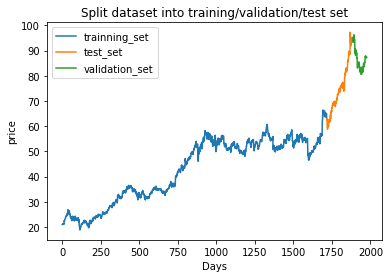

In [47]:
#Visualizing the train, test and validation sets in single plot
#Starbucks
plot_3DataSets()

In [48]:
x_train

,Open,High,Low,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,
2012-02-21,0.031569,0.030207,0.033228,0.106963,0.679324,0.433086,0.015142,0.024692,0.001793,0.040310,0.426651
2012-02-22,0.030718,0.027438,0.031906,0.112902,0.686452,0.431018,0.015367,0.002657,0.001584,0.040967,0.424027
2012-02-23,0.031045,0.028146,0.032765,0.106329,0.700101,0.429092,0.015518,0.002354,0.001558,0.041292,0.422577
2012-02-24,0.031438,0.029112,0.033426,0.078110,0.666748,0.427049,0.015832,0.000756,0.000797,0.042686,0.420259
2012-02-27,0.029670,0.028211,0.031312,0.080759,0.651834,0.424888,0.015863,0.000631,0.000755,0.042790,0.417847
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-10,0.572046,0.563056,0.567182,0.170982,0.500958,0.731978,0.597876,0.186887,0.582405,0.599910,0.601113
2018-12-11,0.581871,0.577483,0.581319,0.150312,0.537690,0.706119,0.595937,0.119457,0.578098,0.600467,0.581512
2018-12-12,0.578989,0.577612,0.587660,0.153843,0.555480,0.682191,0.594397,0.094790,0.573857,0.601741,0.567240


# Model Validation
Getting the RMSE and R2 score by predicting the models.

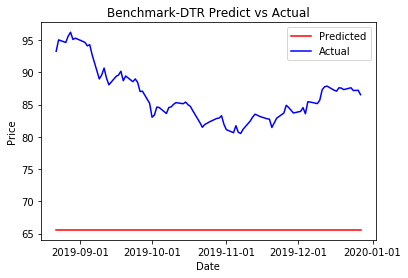

Benchmark-DTR RMSE:  21.062661876991406
Benchmark-DTR R2 score:  -26.443680317986924


In [49]:
#Benchmark - DTR model RMSE and R2 score with plot
RMSE_Score, R2_Score = model_validateResult(model_Benchmark_DTR, model_name = "Benchmark-DTR")

In [50]:
#Benchmark Model
print("RMSE_Score : ", RMSE_Score)
print("R2_Score : ", R2_Score)

RMSE_Score :  21.062661876991406
R2_Score :  -26.443680317986924


# Solution Models validation

# SVR

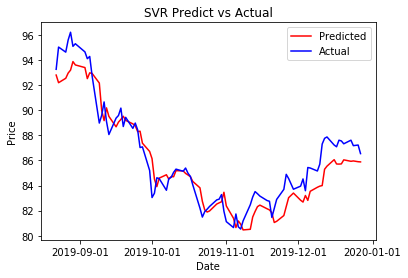

SVR RMSE:  1.4055763757946307
SVR R2 score:  0.8777849364184385


In [51]:
#SVR model
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

In [52]:
#SVR Model
print("SVR RMSE_Score : ", RMSE_Score)
print("SVR R2_Score : ", R2_Score)

SVR RMSE_Score :  1.4055763757946307
SVR R2_Score :  0.8777849364184385


{'C': 300.0, 'epsilon': 0}


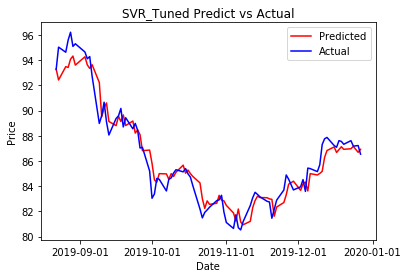

SVR_Tuned RMSE:  1.0378068621009788
SVR_Tuned R2 score:  0.9333732060549099


In [53]:
#SVR model Tuning
RMSE_Score, R2_Score = model_validateResult(model_SVRTuning, model_name = "SVR_Tuned")

In [54]:
#SVR Tuning Model
print("SVR Tuned RMSE_Score : ", RMSE_Score)
print("SVR Tuned R2_Score : ", R2_Score)

SVR Tuned RMSE_Score :  1.0378068621009788
SVR Tuned R2_Score :  0.9333732060549099


# Random Forest

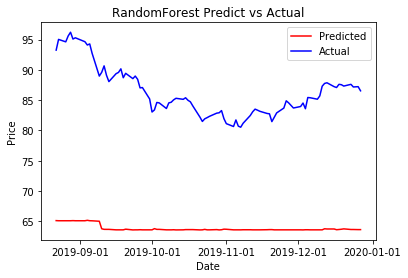

RandomForest RMSE:  22.735701793642082
RandomForest R2 score:  -30.976620916210354


In [55]:
#RF model
#Validate result for randomForest
RMSE_Score, R2_Score = model_validateResult(model_randomForest, "RandomForest")

In [56]:
#RF Model
print("RF RMSE_Score : ", RMSE_Score)
print("RF R2_Score : ", R2_Score)

RF RMSE_Score :  22.735701793642082
RF R2_Score :  -30.976620916210354


{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 10}


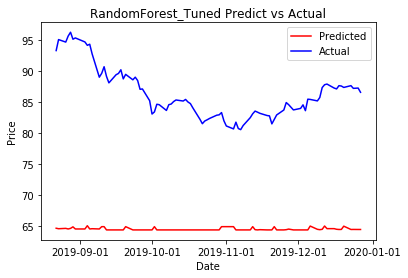

RandomForest_Tuned RMSE:  22.107111575448627
RandomForest_Tuned R2 score:  -29.232902678305255


In [57]:
#Tuned RF model
RMSE_Score, R2_Score = model_validateResult(model_randomForestTuning, "RandomForest_Tuned")

In [58]:
#RF Model
print("RF Tuned RMSE_Score : ", RMSE_Score)
print("RF Tuned R2_Score : ", R2_Score)

RF Tuned RMSE_Score :  22.107111575448627
RF Tuned R2_Score :  -29.232902678305255


# LSTM

Before validating the LSTM model first need to format the data as per LSTM.
So i am passing convertion method


Epoch 1/200
1717/1717 [==============================] - 5s 3ms/step - loss: 1942.5277
Epoch 2/200
1717/1717 [==============================] - 1s 515us/step - loss: 1268.2892
Epoch 3/200
1717/1717 [==============================] - 1s 484us/step - loss: 943.1743
Epoch 4/200
1717/1717 [==============================] - 1s 596us/step - loss: 803.0656
Epoch 5/200
1717/1717 [==============================] - 1s 491us/step - loss: 696.6380
Epoch 6/200
1717/1717 [==============================] - 1s 473us/step - loss: 606.7965
Epoch 7/200
1717/1717 [==============================] - 1s 447us/step - loss: 535.0495
Epoch 8/200
1717/1717 [==============================] - 1s 455us/step - loss: 466.0249
Epoch 9/200
1717/1717 [==============================] - 1s 453us/step - loss: 411.3874
Epoch 10/200
1717/1717 [==============================] - 1s 454us/step - loss: 367.8089
Epoch 11/200
1717/1717 [==============================] - 1s 447us/step - loss: 327.8387
Epoch 12/200
1717/1717 [=====

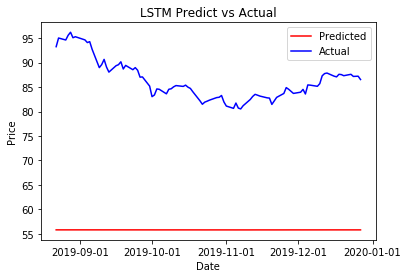

LSTM RMSE:  30.73246315786804
LSTM R2 score:  -57.426595261266364


In [59]:
#Before validating the model first need to format the data as per LSTM.
#
RMSE_Score, R2_Score = model_validateResult(model_LSTM, "LSTM")

In [60]:
#LSTM Model
print("LSTM RMSE_Score : ", RMSE_Score)
print("LSTM R2_Score : ", R2_Score)

LSTM RMSE_Score :  30.73246315786804
LSTM R2_Score :  -57.426595261266364


Epoch 1/200
1717/1717 [==============================] - 5s 3ms/step - loss: 1681.6081
Epoch 2/200
1717/1717 [==============================] - 1s 807us/step - loss: 922.6090
Epoch 3/200
1717/1717 [==============================] - 1s 824us/step - loss: 699.0171
Epoch 4/200
1717/1717 [==============================] - 1s 800us/step - loss: 542.1268
Epoch 5/200
1717/1717 [==============================] - 1s 808us/step - loss: 420.3390
Epoch 6/200
1717/1717 [==============================] - 1s 797us/step - loss: 347.7599
Epoch 7/200
1717/1717 [==============================] - 1s 792us/step - loss: 291.3888
Epoch 8/200
1717/1717 [==============================] - 1s 814us/step - loss: 258.7210
Epoch 9/200
1717/1717 [==============================] - 1s 790us/step - loss: 231.7367
Epoch 10/200
1717/1717 [==============================] - 1s 804us/step - loss: 211.5414
Epoch 11/200
1717/1717 [==============================] - 1s 800us/step - loss: 196.2255
Epoch 12/200
1717/1717 [=======

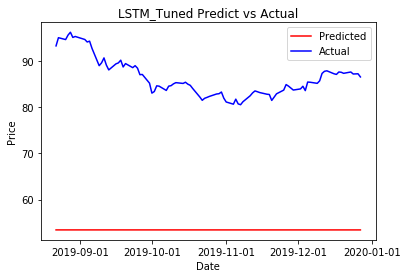

LSTM_Tuned RMSE:  33.06680499534911
LSTM_Tuned R2 score:  -66.63948748124066


In [61]:
#LSTM Tuned
RMSE_Score, R2_Score = model_validateResult(model_LSTMTuning, "LSTM_Tuned")

In [62]:
#LSTM Tuned Model
print("LSTM Tuned RMSE_Score : ", RMSE_Score)
print("LSTM Tuned R2_Score : ", R2_Score)

LSTM Tuned RMSE_Score :  33.06680499534911
LSTM Tuned R2_Score :  -66.63948748124066



# Best Model
# SVM vs Benchmark- DecisionTreeRegressor
Based on the RSME Scroe and R2 Score, I am selecting SVM with tuned model as best model for this.
Below I am going predict the value with test df.

{'C': 300.0, 'epsilon': 0}
SVR_Best Model RMSE:  0.9440338471546559
SVR_Best Model R2 score:  0.9911445502771433


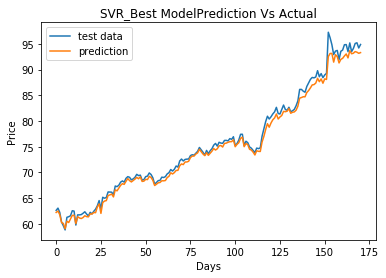

In [63]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model")


Benchmark-DTR RMSE:  13.954225082357135
Benchmark-DTR R2 score:  -0.9348483797483156


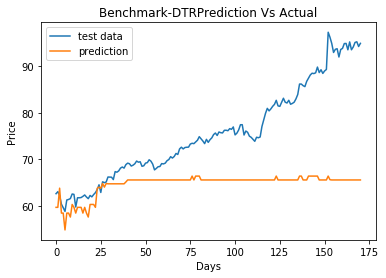

In [64]:
#Benchmarking model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_Benchmark_DTR, model_name = "Benchmark-DTR")

In [65]:
#Benchmark model actual vs prected value
benchmark_starbucks_df = value_Compare(model_Benchmark_DTR)
display(benchmark_starbucks_df)


,True_value,Predicted_value
0,62.634216,59.706837
1,63.071400,59.706837
2,62.235886,63.819469
3,60.380272,58.475086
4,59.641914,58.475086
...,...,...
166,94.082199,65.577927
167,95.057190,65.577927
168,95.195076,65.577927
169,94.180672,65.577927


In [66]:
#SVM_Tuned model actual vs prected value
starbucks_prd_df = value_Compare(model_SVRTuning)
display(starbucks_prd_df)

{'C': 300.0, 'epsilon': 0}


,True_value,Predicted_value
0,62.634216,62.231409
1,63.071400,62.503296
2,62.235886,61.798903
3,60.380272,60.281159
4,59.641914,60.095261
...,...,...
166,94.082199,93.165138
167,95.057190,93.478712
168,95.195076,93.365399
169,94.180672,93.142042


# ATT
I will follow the same steps to validate the ATT data.

In [67]:
#reading CSV
#Fixing date by parsing date columns
#Indexing date columns
att = pd.read_csv(os.path.join(path, 'T.csv'), index_col='Date',parse_dates=True,infer_datetime_format=True)

In [68]:
#checking for null values
print("Att data has missing values : {}".format(att.isnull().values.any()))
#Basic info
display(att.info())

Att data has missing values : False
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2011-12-30 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2012 non-null   float64
 1   High       2012 non-null   float64
 2   Low        2012 non-null   float64
 3   Close      2012 non-null   float64
 4   Adj Close  2012 non-null   float64
 5   Volume     2012 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


None

In [69]:
#Get adj_close data for the technical indicators
df_tech = att['Adj Close']

#calculate technical indicators and adding indicators to the data
final_df = calc_Tech_ind_add_col(df_tech, att)
final_df.columns

Calculating technical indicators of given stock price
RSI column added
MACD column added
SMA column added
STDEV column added
Upper_Band column added
Lower_Band column added
DIFF column added


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MACD',
       'SMA', 'STDEV', 'Upper_Band', 'Lower_Band', 'DIFF'],
      dtype='object')

In [70]:
#Final dataframe with all the technical indicators
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,,,
2011-12-30,30.100000,30.299999,30.080000,30.240000,19.111830,15687800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,30.459999,30.540001,30.299999,30.379999,19.200312,33005300,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,30.580000,30.680000,30.350000,30.430000,19.231915,37213900,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,30.490000,30.500000,30.180000,30.400000,19.212955,34457000,98.426061,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,30.070000,30.090000,29.600000,29.680000,19.033392,45580800,84.871336,NaN,NaN,0.083565,NaN,NaN,NaN


In [71]:
#Checking no of null values in each columns
final_df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
RSI            1
MACD          33
SMA           14
STDEV          4
Upper_Band    14
Lower_Band    14
DIFF          25
dtype: int64

In [72]:
#Removing null rows from final_df
#final_df has 33 null values so dropping those rows --> this is because introduction of technical indicators
final_df = final_df[33:]

In [73]:
#getting feature df from final_df
features_df = final_df[['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD',
       'SMA', 'STDEV', 'Upper_Band', 'Lower_Band', 'DIFF']]
#getting target df from final_df
target_df = final_df[['Adj Close']]

In [74]:
#Checking no of null values in each columns
final_df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
RSI           0
MACD          0
SMA           0
STDEV         0
Upper_Band    0
Lower_Band    0
DIFF          0
dtype: int64

In [75]:
#Check sample of feature and target df
display(features_df.head(5))
display(target_df.head(5))

,Open,High,Low,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,
2012-02-17,30.139999,30.150000,30.000000,31320000,57.729726,0.004170,19.151391,0.049550,19.451273,18.851509,0.011880
2012-02-21,30.100000,30.400000,30.070000,25388800,64.045029,0.009889,19.194143,0.110461,19.470650,18.917637,0.029695
2012-02-22,30.250000,30.370001,30.200001,15731900,62.233736,0.016564,19.231337,0.127178,19.461582,19.001093,0.040395
2012-02-23,30.219999,30.480000,30.219999,22468900,65.380894,0.025252,19.268105,0.128129,19.503844,19.032366,0.057021
2012-02-24,30.430000,30.490000,30.290001,18273700,61.707784,0.033355,19.291619,0.107461,19.527540,19.055698,0.063539


,Adj Close
Date,
2012-02-17,19.245020
2012-02-21,19.456642
2012-02-22,19.418165
2012-02-23,19.533600
2012-02-24,19.456642


# Normalizing the data

In [76]:
#normalizing features df
normalized_features_df = normalize_featuresDF(features_df)

In [77]:
#Get shape of the features and target data
print("feature_df has (rows, columns) : {} ".format(normalized_features_df.shape))
print("target_df has (rows, columns) : {} ".format(target_df.shape))

feature_df has (rows, columns) : (1979, 11) 
target_df has (rows, columns) : (1979, 1) 


In [78]:
#Look at the final feature df and target df before splitting training/test/validation sets
display(normalized_features_df)
display(target_df)

,Open,High,Low,Volume,RSI,MACD,SMA,STDEV,Upper_Band,Lower_Band,DIFF
Date,,,,,,,,,,,
2012-02-17,0.165000,0.129829,0.193587,0.129941,0.589340,0.504386,0.000000,0.011878,0.000000,0.000000,0.509690
2012-02-21,0.162500,0.145662,0.197822,0.098429,0.690997,0.507701,0.002285,0.051259,0.000978,0.003653,0.518948
2012-02-22,0.171875,0.143762,0.205687,0.047123,0.661841,0.511571,0.004274,0.062068,0.000520,0.008262,0.524509
2012-02-23,0.170000,0.150728,0.206897,0.082916,0.712501,0.516607,0.006239,0.062682,0.002654,0.009990,0.533149
2012-02-24,0.183125,0.151362,0.211131,0.060627,0.653375,0.521305,0.007496,0.049320,0.003850,0.011279,0.536537
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.734375,0.717543,0.740472,0.118358,0.651987,0.561653,0.966511,0.144378,0.940278,0.968435,0.618972
2019-12-24,0.725000,0.697910,0.732002,0.009748,0.618788,0.576828,0.971384,0.077476,0.940467,0.978298,0.625044
2019-12-26,0.718125,0.702977,0.736237,0.068832,0.658634,0.591515,0.975048,0.046283,0.945906,0.979916,0.636457


,Adj Close
Date,
2012-02-17,19.245020
2012-02-21,19.456642
2012-02-22,19.418165
2012-02-23,19.533600
2012-02-24,19.456642
...,...
2019-12-23,37.887470
2019-12-24,37.780800
2019-12-26,37.974747


In [79]:
normalized_features_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1979 entries, 2012-02-17 to 2019-12-30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1979 non-null   float64
 1   High        1979 non-null   float64
 2   Low         1979 non-null   float64
 3   Volume      1979 non-null   float64
 4   RSI         1979 non-null   float64
 5   MACD        1979 non-null   float64
 6   SMA         1979 non-null   float64
 7   STDEV       1979 non-null   float64
 8   Upper_Band  1979 non-null   float64
 9   Lower_Band  1979 non-null   float64
 10  DIFF        1979 non-null   float64
dtypes: float64(11)
memory usage: 185.5 KB


# Splitting train, test, validation sets

In [80]:
#Splitting validation sets from the final features and target df
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

In [81]:
print("validation_x has (rows, columns) : {} ".format(validation_x.shape))
print("validation_y has (rows, columns) : {} ".format(validation_y.shape))

validation_x has (rows, columns) : (89, 11) 
validation_y has (rows, columns) : (89, 1) 


In [82]:
#splitting train and test set from validation set

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

In [83]:
print("final_features_df has (rows, columns) : {} ".format(final_features_df.shape))
print("final_target_df has (rows, columns) : {} ".format(final_target_df.shape))

final_features_df has (rows, columns) : (1889, 11) 
final_target_df has (rows, columns) : (1889, 1) 


# Splitting Train and Test using Skleans TimeSeriesSplit 

In [84]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

In [85]:
print("Shape of training sets x_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Shape of testing sets x_train : {}, y_train : {}".format(x_test.shape, y_test.shape))

Shape of training sets x_train : (1718, 11), y_train : (1718,)
Shape of testing sets x_train : (171, 11), y_train : (171,)


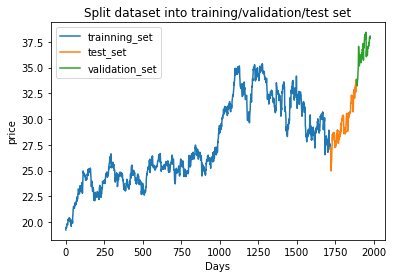

In [86]:
#Visualizing the train, test and validation sets in single plot

plot_3DataSets()

# Model Validation
Getting the RMSE and R2 score by predicting the models

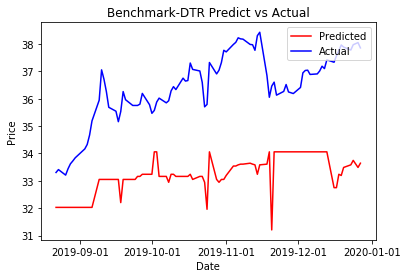

Benchmark-DTR RMSE:  3.3797347895153855
Benchmark-DTR R2 score:  -6.141965222683424


In [87]:
#Benchmark - DTR model RMSE and R2 score with plot
RMSE_Score, R2_Score = model_validateResult(model_Benchmark_DTR, model_name = "Benchmark-DTR")

In [88]:
#Benchmark Model
print("RMSE_Score : ", RMSE_Score)
print("R2_Score : ", R2_Score)

RMSE_Score :  3.3797347895153855
R2_Score :  -6.141965222683424


# SVR

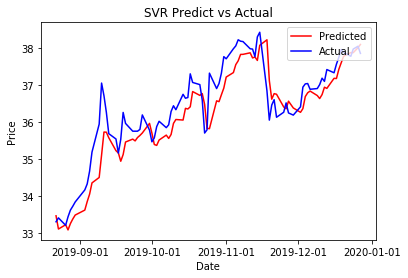

SVR RMSE:  0.5465560321861685
SVR R2 score:  0.8132236558878775


In [89]:
#SVR model
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

{'C': 700.0, 'epsilon': 0.1}


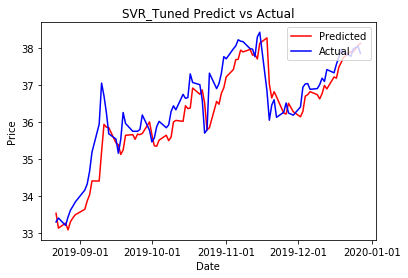

SVR_Tuned RMSE:  0.5280982429371495
SVR_Tuned R2 score:  0.8256259189929105


In [90]:
#SVR model Tuning
RMSE_Score, R2_Score = model_validateResult(model_SVRTuning, model_name = "SVR_Tuned")

# Random Forest

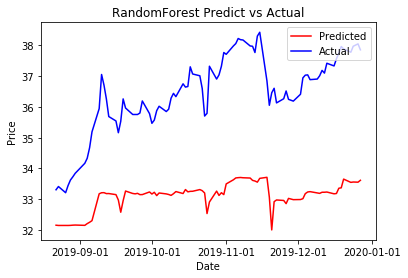

RandomForest RMSE:  3.4731870505459805
RandomForest R2 score:  -6.542387359319288


In [91]:
#RF model
#Validate result for randomForest
RMSE_Score, R2_Score = model_validateResult(model_randomForest, "RandomForest")

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}


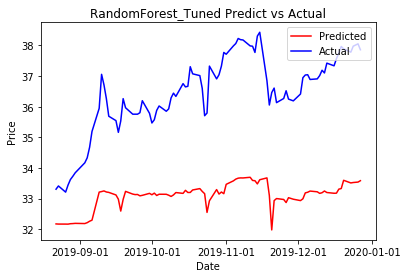

RandomForest_Tuned RMSE:  3.4890874818522417
RandomForest_Tuned R2 score:  -6.611604321640032


In [92]:
#Tuned RF model
RMSE_Score, R2_Score = model_validateResult(model_randomForestTuning, "RandomForest_Tuned")

# LSTM

Epoch 1/200
1718/1718 [==============================] - 6s 3ms/step - loss: 749.3011
Epoch 2/200
1718/1718 [==============================] - 1s 490us/step - loss: 374.0419
Epoch 3/200
1718/1718 [==============================] - 1s 486us/step - loss: 209.0701
Epoch 4/200
1718/1718 [==============================] - 1s 502us/step - loss: 149.8225
Epoch 5/200
1718/1718 [==============================] - 2s 986us/step - loss: 107.6987
Epoch 6/200
1718/1718 [==============================] - 1s 749us/step - loss: 78.8775
Epoch 7/200
1718/1718 [==============================] - 1s 698us/step - loss: 58.7365
Epoch 8/200
1718/1718 [==============================] - 1s 510us/step - loss: 45.2322
Epoch 9/200
1718/1718 [==============================] - 1s 503us/step - loss: 35.6175
Epoch 10/200
1718/1718 [==============================] - 1s 496us/step - loss: 28.8678
Epoch 11/200
1718/1718 [==============================] - 1s 511us/step - loss: 24.5085
Epoch 12/200
1718/1718 [==============

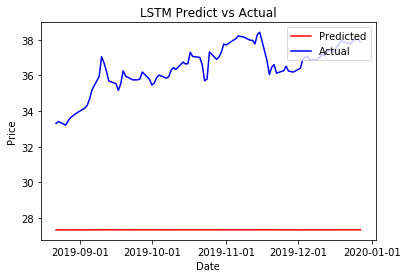

LSTM RMSE:  9.211724550446645
LSTM R2 score:  -52.05598394393387


In [93]:
#Before validating the model first need to format the data as per LSTM.
#
RMSE_Score, R2_Score = model_validateResult(model_LSTM, "LSTM")

Epoch 1/200
1718/1718 [==============================] - 6s 3ms/step - loss: 586.5296
Epoch 2/200
1718/1718 [==============================] - 1s 763us/step - loss: 201.0336
Epoch 3/200
1718/1718 [==============================] - 1s 760us/step - loss: 109.7688
Epoch 4/200
1718/1718 [==============================] - 1s 802us/step - loss: 67.2375
Epoch 5/200
1718/1718 [==============================] - 1s 796us/step - loss: 44.8326
Epoch 6/200
1718/1718 [==============================] - 1s 766us/step - loss: 35.2450
Epoch 7/200
1718/1718 [==============================] - 1s 754us/step - loss: 32.5811
Epoch 8/200
1718/1718 [==============================] - 1s 766us/step - loss: 31.2160
Epoch 9/200
1718/1718 [==============================] - 1s 755us/step - loss: 29.1555
Epoch 10/200
1718/1718 [==============================] - 1s 760us/step - loss: 29.1866
Epoch 11/200
1718/1718 [==============================] - 1s 772us/step - loss: 30.6320
Epoch 12/200
1718/1718 [================

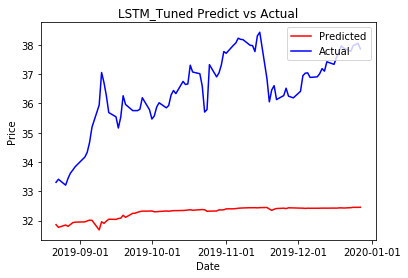

LSTM_Tuned RMSE:  4.313116748225611
LSTM_Tuned R2 score:  -10.631478291317537


In [94]:
#LSTM Tuned
RMSE_Score, R2_Score = model_validateResult(model_LSTMTuning, "LSTM_Tuned")

# Best Model
# SVM vs Benchmark- DecisionTreeRegressor

In [95]:
# SVR with tuned hyper parameter is best model in above cases.
#So i am using SVR Tunned model as final solution model.
# Evaluatiing Benchmark and Best model with testing set.



{'C': 700.0, 'epsilon': 0.1}
SVR_Best Model RMSE:  0.22409840651574023
SVR_Best Model R2 score:  0.9857352265813928


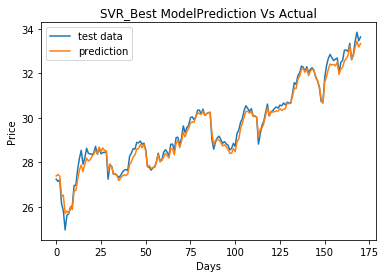

In [96]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model")


Benchmark-DTR RMSE:  0.7520435533583852
Benchmark-DTR R2 score:  0.8393527386061143


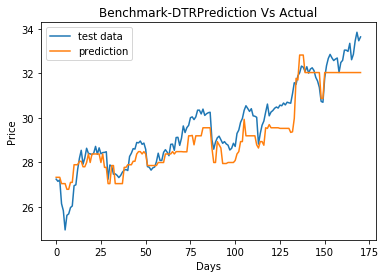

In [97]:
#Benchmarking model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_Benchmark_DTR, model_name = "Benchmark-DTR")

In [99]:
#Benchmark model actual vs prected value
att_bench_df = value_Compare(model_Benchmark_DTR)
display(att_bench_df)

,True_value,Predicted_value
0,27.242346,27.324455
1,27.141987,27.324455
2,27.205853,27.324455
3,26.138416,27.041630
4,25.828224,27.041630
...,...,...
166,32.847504,32.031246
167,33.450123,32.031246
168,33.842304,32.031246
169,33.459682,32.031246


In [100]:
#SVM_Tuned model actual vs prected value
att_pred_df = value_Compare(model_SVRTuning)
display(att_pred_df)

{'C': 700.0, 'epsilon': 0.1}


,True_value,Predicted_value
0,27.242346,27.384466
1,27.141987,27.453404
2,27.205853,27.380427
3,26.138416,26.469648
4,25.828224,26.526224
...,...,...
166,32.847504,32.795403
167,33.450123,33.172082
168,33.842304,33.441133
169,33.459682,33.182074


# Conclusion

   After looking at RMSE and R2 scores of all the solution models i am using SVR as best solution model. Actual trendline and predicted trendline clearly shows that SVR model is good fit for this stocks. After tuning SVR model with C and epsilon prediction is improved. So I will consider this parameter for the modelling.
     
   I can say that it is impossible to get 99% model prediction because there are too many factors can affect the stock prices. But we can atleast predict the general trendline by taking vairous factors into consideration.
     
     
     
# Challenges

  I spent most of the time on data exploration, feature extraction. As i am new to ML, it was very hard to decide good model for this project and also i spent whole 2days to decide technical indicators. Formatting the data for LSTM model is other difficult step for me.
    
# Improvement

  Thre are number of algorithms to predict the time-series analysis and various technical indicators. We can also predict by considering sentiments from news, social media and different sources. For this project i have just selected basic methods, as i move forward i will add more useful inputs to models. 
    
   Stock prediction is time-series analysis instead 8 years of historical data, I shoud have used more. And also by increasing the epoches and trying differenct activation function and model funcitions i would have got better result.

This is not the end for me to learn Machine Learning, it's just beginning...
   